In [2]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

import matplotlib.dates as mdates

## Price correlation of non-stablecoins

In [3]:
files_to_use = ["coin_Aave.csv",
                "coin_BinanceCoin.csv",
                "coin_Bitcoin.csv",
                "coin_Cardano.csv",
                "coin_ChainLink.csv",
                "coin_Cosmos.csv",
                # "coin_CryptocomCoin.csv",
                "coin_Dogecoin.csv",
                "coin_EOS.csv",
                "coin_Ethereum.csv",
                "coin_Iota.csv",
                "coin_Litecoin.csv",
                "coin_Monero.csv",
                "coin_NEM.csv",
                "coin_Polkadot.csv",
                "coin_Solana.csv",
                "coin_Stellar.csv",
                #"coin_Tether.csv",
                "coin_Tron.csv",
                "coin_Uniswap.csv",
                #"coin_USDCoin.csv",
                "coin_WrappedBitcoin.csv",
                "coin_XRP.csv"
               ]

cols_to_use = []
for ind, file_name in enumerate(files_to_use):
    currency_name = file_name.split("_")[1]
    if ind == 0:
        df = pd.read_csv("../../resources/prices/"+file_name, usecols=["Date", "Close"], parse_dates=["Date"])
        df.columns = ["Date", currency_name]
    else:
        temp_df = pd.read_csv("../../resources/prices/"+file_name, usecols=["Date", "Close"], parse_dates=["Date"])
        temp_df.columns = ["Date", currency_name]
        df = pd.merge(df, temp_df, on="Date")
    cols_to_use.append(currency_name)
df.head()

,Date,Aave.csv,BinanceCoin.csv,Bitcoin.csv,Cardano.csv,ChainLink.csv,Cosmos.csv,Dogecoin.csv,EOS.csv,Ethereum.csv,...,Litecoin.csv,Monero.csv,NEM.csv,Polkadot.csv,Solana.csv,Stellar.csv,Tron.csv,Uniswap.csv,WrappedBitcoin.csv,XRP.csv
0,2020-10-05 23:59:59,53.219243,28.659104,10793.339428,0.097544,9.623703,5.382198,0.002612,2.529068,353.956772,...,46.363226,112.903248,0.122335,4.172700,2.657644,0.073419,0.026443,3.419205,10798.551697,0.250816
1,2020-10-06 23:59:59,42.401599,27.714528,10604.405889,0.092808,8.779272,4.732915,0.002611,2.693054,340.815845,...,45.985530,106.665996,0.117298,3.756162,2.176250,0.072501,0.025580,2.834241,10612.537839,0.245341
2,2020-10-07 23:59:59,40.083976,27.704836,10668.968955,0.093800,8.957850,4.886457,0.002595,2.646043,341.808669,...,46.660479,109.989031,0.117939,3.858798,2.291796,0.072301,0.025477,2.800064,10670.392931,0.248539
3,2020-10-08 23:59:59,43.764463,27.705311,10915.685731,0.096152,9.508818,5.045788,0.002596,2.609671,350.766159,...,47.218381,110.909933,0.119316,4.102642,2.365220,0.073095,0.025671,3.270306,10908.859624,0.251454
4,2020-10-09 23:59:59,46.817744,28.445031,11064.457592,0.101925,10.346902,5.157042,0.002653,2.645295,365.590477,...,47.832955,116.034673,0.119971,4.262468,2.539859,0.075144,0.026223,3.097367,11071.433697,0.253491


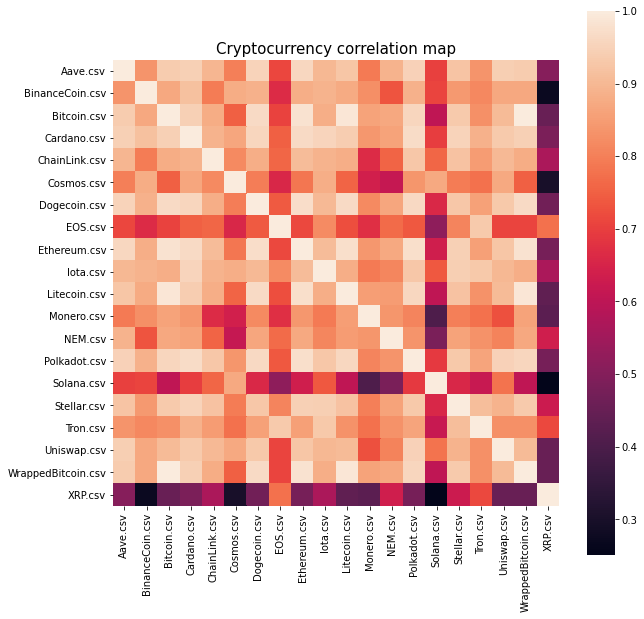

In [4]:
temp_df = df[cols_to_use]
corrmat = temp_df.corr(method='spearman')
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Cryptocurrency correlation map", fontsize=15)
plt.show()